In [4]:
import wandb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy
import json
import seaborn as sns

api = wandb.Api()

## Clause Compliance for Citeseer
|         | overall | train  | valid  | test    |
|---------|---------|--------|--------|---------|
| Class_0 | 0.3646  | 0.3086 | 0.1666 | 0.4166  |
| Class_1 | 0.6366  | 0.5721 | 0.7741 | 0.6281  |
| Class_2 | 0.7835  | 0.7837 | 0.75   | 0.7762  |
| Class_3 | 0.7625  | 0.72   | 0.8    | 0.7894  |
| Class_4 | 0.7951  | 0.7705 | 0.8846 | 0.8088  |
| Class_5 | 0.7910  | 0.7739 | 0.6666 | 0.84482 |


## Class Distribution for Citeseer
|         | overall | train  | valid   | test   |
|---------|---------|--------|---------|--------|
| Class_0 | 0.0793  | 0.0864 | 0.058   | 0.077  |
| Class_1 | 0.1773  | 0.1762 | 0.172   | 0.182  |
| Class_2 | 0.2007  | 0.2030 | 0.232   | 0.181  |
| Class_3 | 0.2107  | 0.1992 | 0.212   | 0.231  |
| Class_4 | 0.1791  | 0.1822 | 0.188   | 0.169  |
| Class_5 | 0.1526  | 0.1527 | 0.138   | 0.16   |


# How do the clause weights behave during training?
We take as example the clause weights over all epochs for runs of KeGCN on the Citeseer dataset. 3 KE Layers are stacked. The weights are initialized differently.


Clause Weight initialization 0.5

In [5]:
# clause weight 0.5, 3 layers
skilled=api.run("luisawerner/ijcai23_citeseer_kenngcn_2/8k9m5a8i").summary['logged_clause_weights']
skilled_weights = eval(skilled)
cw_0 = 0.5

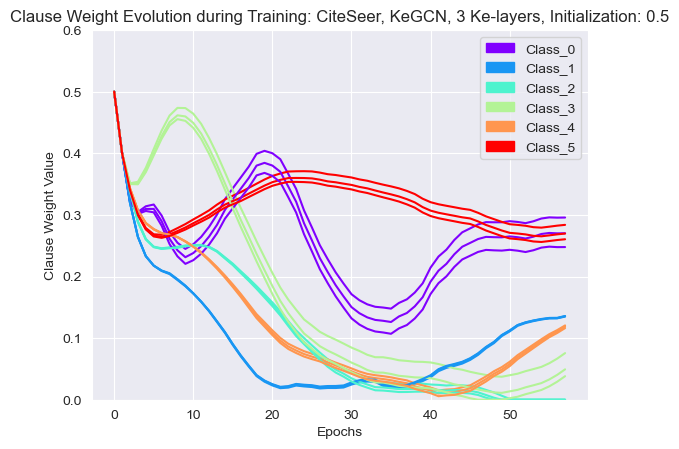

<Figure size 640x480 with 0 Axes>

In [6]:
plt.figure()
color = plt.cm.rainbow(np.linspace(0, 1, 6))
patches = []
for k, j in enumerate(['0', '1', '2', '3', '4', '5']):
    patches.append(mpatches.Patch(color=color[k], label='Class_'+j))
    _list = [cw_0] + skilled_weights[0][0][j]
    plt.plot(_list, color=color[k])
    # for i, v in enumerate(skilled_weights[0][0][j]):
    #     plt.scatter(i, v, color=color[k])


plt.legend(handles=patches)
plt.ylim(0.00, 0.6)
# plt.savefig('test_clause_weights, layer 0 ')


patches = []
for k, j in enumerate(['0', '1', '2', '3', '4', '5']):
    patches.append(mpatches.Patch(color=color[k], label='Class_'+j))
    _list = [cw_0] + skilled_weights[0][1][j]
    plt.plot(_list, color=color[k])
    # for i, v in enumerate(skilled_weights[0][0][j]):
    #     plt.scatter(i, v, color=color[k])


plt.legend(handles=patches)
plt.ylim(0.00, 0.6)
# plt.savefig('test_clause_weights_layer2')

patches = []
for k, j in enumerate(['0', '1', '2', '3', '4', '5']):
    patches.append(mpatches.Patch(color=color[k], label='Class_'+j))
    _list = [cw_0] + skilled_weights[0][2][j]
    plt.plot(_list, color=color[k])
    # for i, v in enumerate(skilled_weights[0][0][j]):
    #     plt.scatter(i, v, color=color[k])


plt.legend(handles=patches)
plt.ylim(0.00, 0.6)
plt.xlabel('Epochs')
plt.ylabel('Clause Weight Value')
plt.title(f'Clause Weight Evolution during Training: CiteSeer, KeGCN, 3 Ke-layers, Initialization: {cw_0}')
plt.show()
plt.savefig('figures/test_clause_weights_layer3')


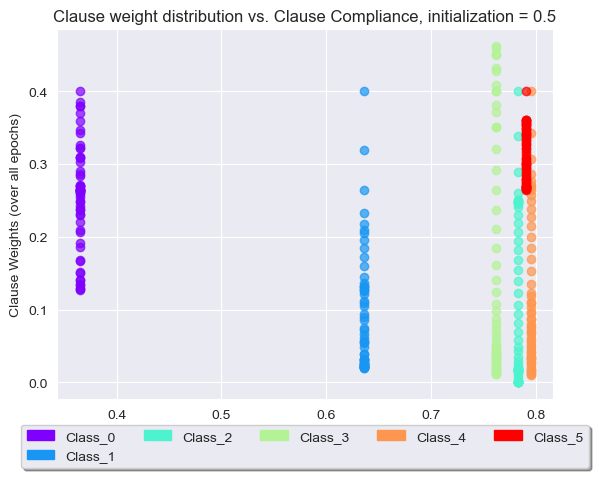

In [7]:
plt.figure()
compliance = [0.3646, 0.6366,0.7835, 0.7625, 0.7951, 0.7910]

patches = []
for k, j in enumerate(['0', '1', '2', '3', '4', '5']):
    patches.append(mpatches.Patch(color=color[k], label='Class_'+j))
    _list = skilled_weights[0][1][j]
    for i in _list:
        plt.scatter(compliance[k], i, color=color[k], alpha=0.7)

plt.xlabel('Clause Compliance')
plt.ylabel('Clause Weights (over all epochs)')
#plt.legend(handles=patches)
plt.title(f'Clause weight distribution vs. Clause Compliance, initialization = {cw_0}')
plt.legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.show()

Example for Clause Weight initialization 0.25


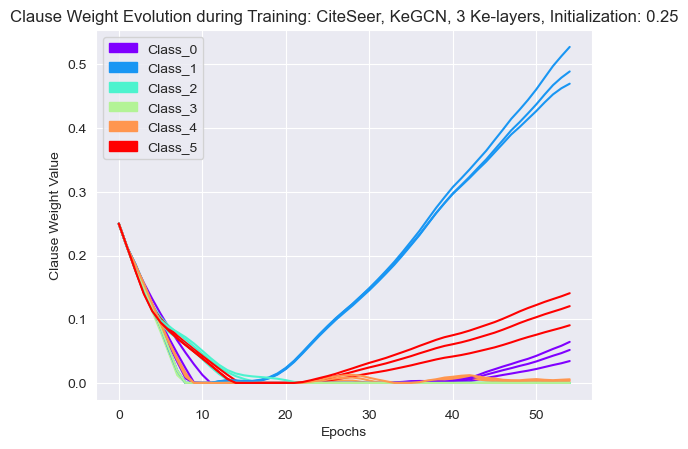

In [8]:
dainty24=api.run("luisawerner/ijcai23_citeseer_kenngcn_2/yqyplmqf").summary['logged_clause_weights']
dainty = eval(dainty24)
cw_0 = 0.25
plt.figure()
color = plt.cm.rainbow(np.linspace(0, 1, 6))
patches = []
for k, j in enumerate(['0', '1', '2', '3', '4', '5']):
    patches.append(mpatches.Patch(color=color[k], label='Class_'+j))
    lista = [cw_0] + dainty[0][0][j]
    plt.plot(lista, color=color[k])
    # for i, v in enumerate(skilled_weights[0][0][j]):
    #     plt.scatter(i, v, color=color[k])


plt.legend(handles=patches)
#plt.ylim(0.00, 0.6)
#plt.savefig('test_clause_weights_layer0_025 ')


patches = []
for k, j in enumerate(['0', '1', '2', '3', '4', '5']):
    patches.append(mpatches.Patch(color=color[k], label='Class_'+j))
    lista = [cw_0] + dainty[0][1][j]
    plt.plot(lista, color=color[k])
    # for i, v in enumerate(skilled_weights[0][0][j]):
    #     plt.scatter(i, v, color=color[k])


plt.legend(handles=patches)
#plt.ylim(0.00, 0.6)
#plt.savefig('test_clause_weights_layer2_025')

patches = []
for k, j in enumerate(['0', '1', '2', '3', '4', '5']):
    patches.append(mpatches.Patch(color=color[k], label='Class_'+j))
    lista = [cw_0] + dainty[0][2][j]
    plt.plot(lista, color=color[k])
    # for i, v in enumerate(skilled_weights[0][0][j]):
    #     plt.scatter(i, v, color=color[k])


plt.legend(handles=patches)
#plt.ylim(0.00, 0.6)
plt.xlabel('Epochs')
plt.ylabel('Clause Weight Value')
plt.title(f'Clause Weight Evolution during Training: CiteSeer, KeGCN, 3 Ke-layers, Initialization: {cw_0}')
plt.savefig('figures/test_clause_weights_layer3_025')

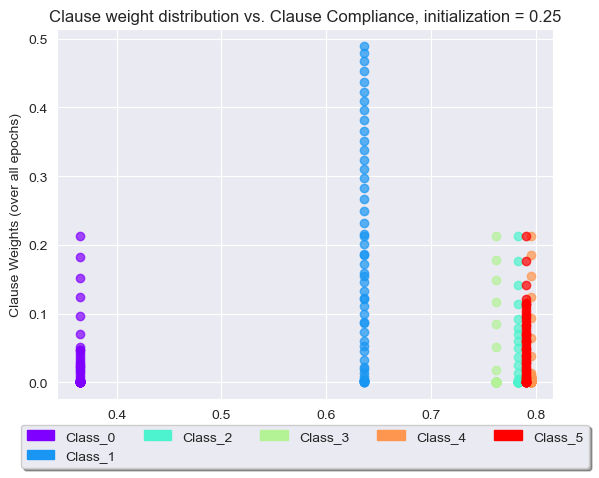

In [9]:
plt.figure()
compliance = [0.3646, 0.6366,0.7835, 0.7625, 0.7951, 0.7910]

patches = []
for k, j in enumerate(['0', '1', '2', '3', '4', '5']):
    patches.append(mpatches.Patch(color=color[k], label='Class_'+j))
    _list = dainty[0][1][j]
    for i in _list:
        plt.scatter(compliance[k], i, color=color[k], alpha=0.7)

plt.xlabel('Clause Compliance')
plt.ylabel('Clause Weights (over all epochs)')
#plt.legend(handles=patches)
plt.title(f'Clause weight distribution vs. Clause Compliance, initialization = {cw_0}')
plt.legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.show()

Example for clause weight initialization 0.0001

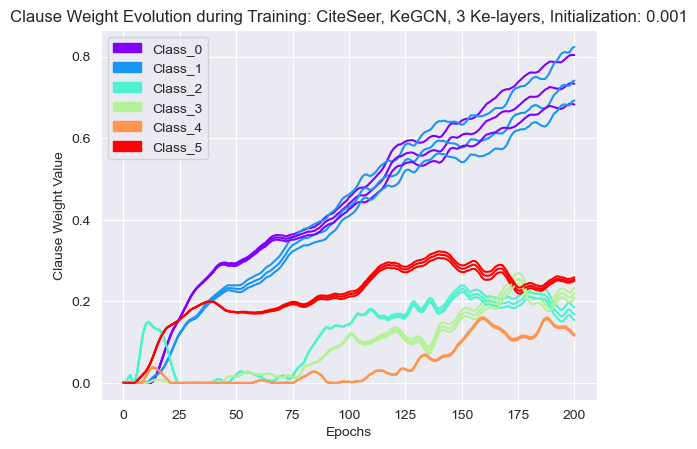

In [10]:
smooth=api.run("luisawerner/ijcai23_citeseer_kenngcn_2/my2jz6iq").summary['logged_clause_weights']
smooth = eval(smooth)
cw_0 = 0.001
plt.figure()
color = plt.cm.rainbow(np.linspace(0, 1, 6))
patches = []
for k, j in enumerate(['0', '1', '2', '3', '4', '5']):
    patches.append(mpatches.Patch(color=color[k], label='Class_'+j))
    lista = [cw_0] + smooth[0][0][j]
    plt.plot(lista, color=color[k])
    # for i, v in enumerate(skilled_weights[0][0][j]):
    #     plt.scatter(i, v, color=color[k])


plt.legend(handles=patches)
#plt.ylim(0.00, 0.6)
#plt.savefig('test_clause_weights_layer0_025 ')


patches = []
for k, j in enumerate(['0', '1', '2', '3', '4', '5']):
    patches.append(mpatches.Patch(color=color[k], label='Class_'+j))
    lista = [cw_0] + smooth[0][1][j]
    plt.plot(lista, color=color[k])
    # for i, v in enumerate(skilled_weights[0][0][j]):
    #     plt.scatter(i, v, color=color[k])


plt.legend(handles=patches)
#plt.ylim(0.00, 0.6)
#plt.savefig('test_clause_weights_layer2_025')

patches = []
for k, j in enumerate(['0', '1', '2', '3', '4', '5']):
    patches.append(mpatches.Patch(color=color[k], label='Class_'+j))
    lista = [cw_0] + smooth[0][2][j]
    plt.plot(lista, color=color[k])
    # for i, v in enumerate(skilled_weights[0][0][j]):
    #     plt.scatter(i, v, color=color[k])


plt.legend(handles=patches)
#plt.ylim(0.00, 0.6)
plt.xlabel('Epochs')
plt.ylabel('Clause Weight Value')
plt.title(f'Clause Weight Evolution during Training: CiteSeer, KeGCN, 3 Ke-layers, Initialization: {cw_0}')
plt.savefig('figures/test_clause_weights_layer3_0001')

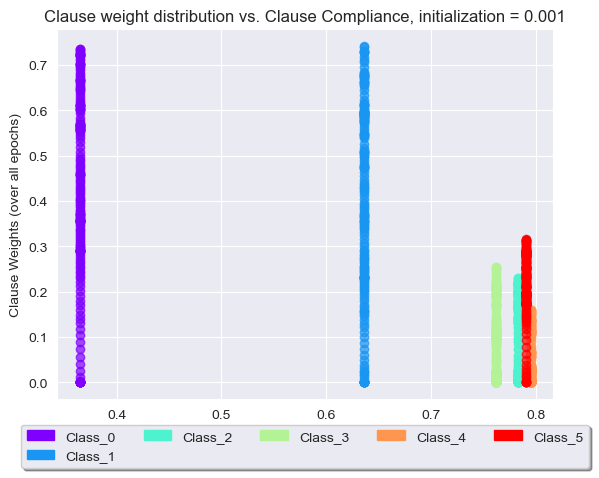

In [11]:
plt.figure()
compliance = [0.3646, 0.6366,0.7835, 0.7625, 0.7951, 0.7910]

patches = []
for k, j in enumerate(['0', '1', '2', '3', '4', '5']):
    patches.append(mpatches.Patch(color=color[k], label='Class_'+j))
    _list = smooth[0][1][j]
    for i in _list:
        plt.scatter(compliance[k], i, color=color[k], alpha=0.7)

plt.xlabel('Clause Compliance')
plt.ylabel('Clause Weights (over all epochs)')
#plt.legend(handles=patches)
plt.title(f'Clause weight distribution vs. Clause Compliance, initialization = {cw_0}')
plt.legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.show()

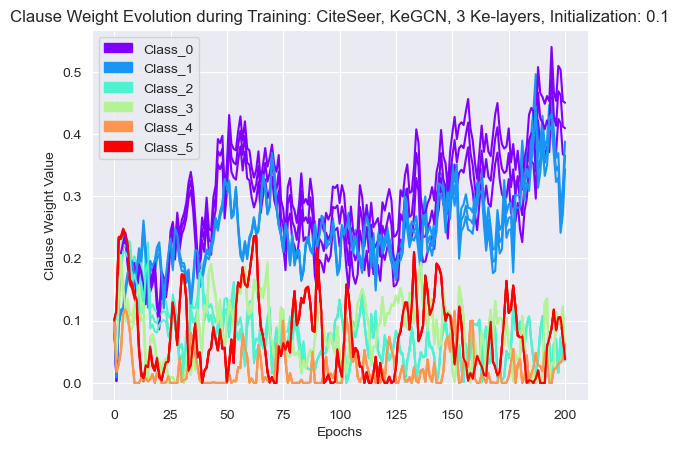

In [12]:
jolly=api.run("luisawerner/ijcai23_citeseer_kenngcn_2/j1wph4m6").summary['logged_clause_weights']
jolly = eval(jolly)
cw_0 = 0.1
plt.figure()
color = plt.cm.rainbow(np.linspace(0, 1, 6))
patches = []
for k, j in enumerate(['0', '1', '2', '3', '4', '5']):
    patches.append(mpatches.Patch(color=color[k], label='Class_'+j))
    lista = [cw_0] + jolly[0][0][j]
    plt.plot(lista, color=color[k])
    # for i, v in enumerate(skilled_weights[0][0][j]):
    #     plt.scatter(i, v, color=color[k])


plt.legend(handles=patches)
#plt.ylim(0.00, 0.6)
#plt.savefig('test_clause_weights_layer0_025 ')


patches = []
for k, j in enumerate(['0', '1', '2', '3', '4', '5']):
    patches.append(mpatches.Patch(color=color[k], label='Class_'+j))
    lista = [cw_0] + jolly[0][1][j]
    plt.plot(lista, color=color[k])
    # for i, v in enumerate(skilled_weights[0][0][j]):
    #     plt.scatter(i, v, color=color[k])


plt.legend(handles=patches)
#plt.ylim(0.00, 0.6)
#plt.savefig('test_clause_weights_layer2_025')

patches = []
for k, j in enumerate(['0', '1', '2', '3', '4', '5']):
    patches.append(mpatches.Patch(color=color[k], label='Class_'+j))
    lista = [cw_0] + jolly[0][2][j]
    plt.plot(lista, color=color[k])
    # for i, v in enumerate(skilled_weights[0][0][j]):
    #     plt.scatter(i, v, color=color[k])


plt.legend(handles=patches)
#plt.ylim(0.00, 0.6)
plt.xlabel('Epochs')
plt.ylabel('Clause Weight Value')
plt.title(f'Clause Weight Evolution during Training: CiteSeer, KeGCN, 3 Ke-layers, Initialization: {cw_0}')
plt.savefig('figures/test_clause_weights_layer3_01')

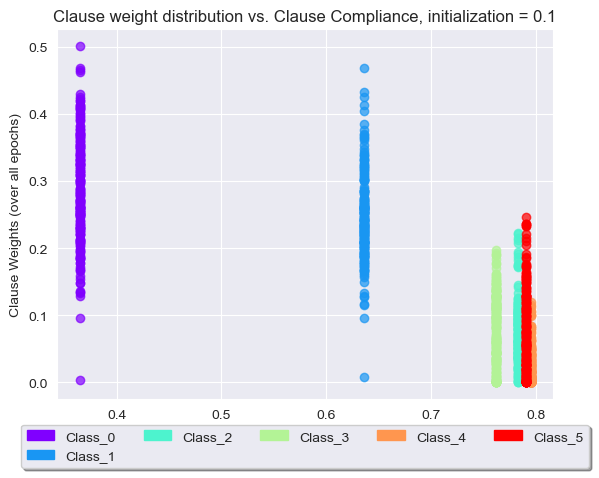

In [13]:
plt.figure()
compliance = [0.3646, 0.6366,0.7835, 0.7625, 0.7951, 0.7910]

patches = []
for k, j in enumerate(['0', '1', '2', '3', '4', '5']):
    patches.append(mpatches.Patch(color=color[k], label='Class_'+j))
    _list = jolly[0][1][j]
    for i in _list:
        plt.scatter(compliance[k], i, color=color[k], alpha=0.7)

plt.xlabel('Clause Compliance')
plt.ylabel('Clause Weights (over all epochs)')
#plt.legend(handles=patches)
plt.title(f'Clause weight distribution vs. Clause Compliance, initialization = {cw_0}')
plt.legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.show()

Weight clipping at -0.24


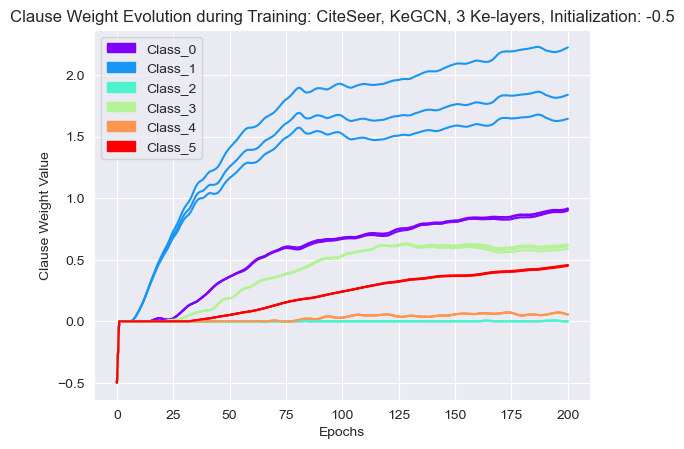

In [14]:
jolly = api.run("luisawerner/ijcai23_citeseer_kenngcn_2/vdjwae4h").summary['logged_clause_weights']
jolly = eval(jolly)
cw_0 = -0.5
plt.figure()
color = plt.cm.rainbow(np.linspace(0, 1, 6))
patches = []
for k, j in enumerate(['0', '1', '2', '3', '4', '5']):
    patches.append(mpatches.Patch(color=color[k], label='Class_'+j))
    lista = [cw_0] + jolly[0][0][j]
    plt.plot(lista, color=color[k])
    # for i, v in enumerate(skilled_weights[0][0][j]):
    #     plt.scatter(i, v, color=color[k])


plt.legend(handles=patches)
#plt.ylim(0.00, 0.6)
#plt.savefig('test_clause_weights_layer0_025 ')


patches = []
for k, j in enumerate(['0', '1', '2', '3', '4', '5']):
    patches.append(mpatches.Patch(color=color[k], label='Class_'+j))
    lista = [cw_0] + jolly[0][1][j]
    plt.plot(lista, color=color[k])
    # for i, v in enumerate(skilled_weights[0][0][j]):
    #     plt.scatter(i, v, color=color[k])


plt.legend(handles=patches)
#plt.ylim(0.00, 0.6)
#plt.savefig('test_clause_weights_layer2_025')

patches = []
for k, j in enumerate(['0', '1', '2', '3', '4', '5']):
    patches.append(mpatches.Patch(color=color[k], label='Class_'+j))
    lista = [cw_0] + jolly[0][2][j]
    plt.plot(lista, color=color[k])
    # for i, v in enumerate(skilled_weights[0][0][j]):
    #     plt.scatter(i, v, color=color[k])


plt.legend(handles=patches)
#plt.ylim(0.00, 0.6)
plt.xlabel('Epochs')
plt.ylabel('Clause Weight Value')
plt.title(f'Clause Weight Evolution during Training: CiteSeer, KeGCN, 3 Ke-layers, Initialization: {cw_0}')
plt.savefig('figures/test_clause_weights_layer3_01')
print('Weight clipping at -0.24')

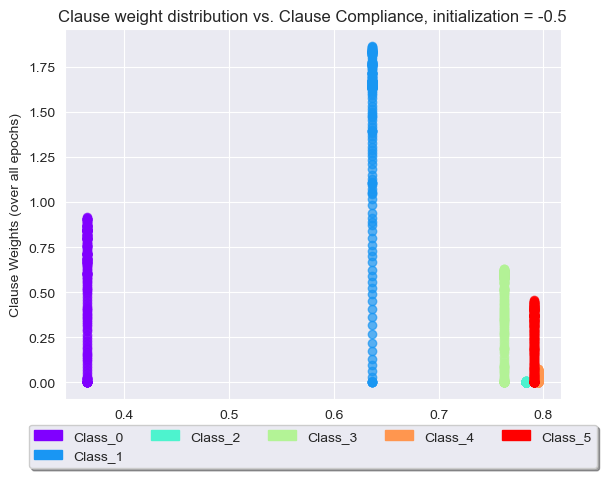

In [15]:
plt.figure()
compliance = [0.3646, 0.6366,0.7835, 0.7625, 0.7951, 0.7910]

patches = []
for k, j in enumerate(['0', '1', '2', '3', '4', '5']):
    patches.append(mpatches.Patch(color=color[k], label='Class_'+j))
    _list = jolly[0][1][j]
    for i in _list:
        plt.scatter(compliance[k], i, color=color[k], alpha=0.7)

plt.xlabel('Clause Compliance')
plt.ylabel('Clause Weights (over all epochs)')
#plt.legend(handles=patches)
plt.title(f'Clause weight distribution vs. Clause Compliance, initialization = {cw_0}')
plt.legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.show()

Calculate several runs and compute correlation of clause weight and compliance


# Analyse clause weights with the same initialization across 50 runs for CiteSeer and Cora


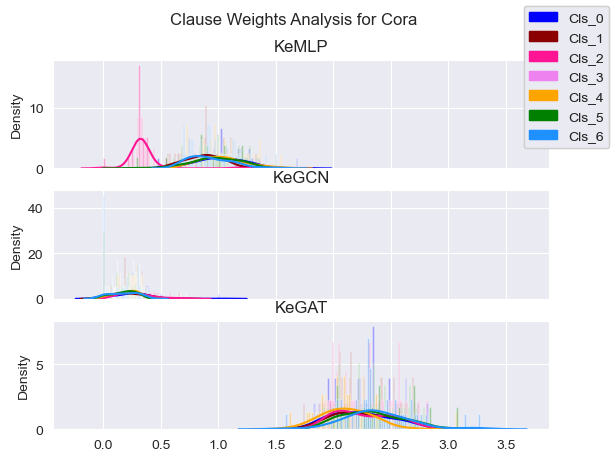

In [16]:
# CiteSeer
bins = 100
import seaborn as sns
import warnings
import matplotlib.patches as mpatches
warnings.simplefilter(action='ignore', category=FutureWarning)
num_classes=7

fig, axs = plt.subplots(3, sharex=True)
# make legend
color= ['blue', 'darkred', 'deeppink', 'violet', 'orange', 'green', 'dodgerblue']
handles = []
for i in range(num_classes):
    handles.append(mpatches.Patch(color=color[i], label='Cls_' + str(i)))
fig.legend(handles=handles)

#fig, axs = plt.subplots(3, sharex=True)
fig.suptitle('Clause Weights Analysis for Cora')
# Cora KeMLP
run_mlp = api.run("luisawerner/nesy23_clauseweights/kn8migwx")
mlp_cw_0 = run_mlp.config["clause_weight"]
mlp_cora_cw = eval(run_mlp.summary['logged_clause_weights'])

gcn_run = api.run("luisawerner/nesy23_clauseweights/jdy6cl5l")
gcn_cw_0 = gcn_run.config["clause_weight"]
gcn_cora_cw = eval(gcn_run.summary['logged_clause_weights'])

gat_run = api.run("luisawerner/nesy23_clauseweights/05c0g94v")
gat_cw_0 = gat_run.config["clause_weight"]
gat_cora_cw = eval(gat_run.summary['logged_clause_weights'])

# KeMLP
for i in ['0', '1', '2', '4', '5', '6']:
    sns.distplot([value[0][i][-1] for _, value  in mlp_cora_cw.items()], bins=bins, color=color[int(i)], label=str('Cls_'+ i), ax=axs[0] )
axs[0].set_title(f'KeMLP')

#KeGCN
for i in ['0', '1', '2', '4', '5', '6']:
    sns.distplot([value[0][i][-1] for _, value  in gcn_cora_cw.items()], bins=bins, color=color[int(i)], label=str('Cls_'+ i), ax=axs[1] )
axs[1].set_title(f'KeGCN')

# KeGAT
for i in ['0', '1', '2', '4', '5', '6']:
    sns.distplot([value[0][i][-1] for _, value  in gat_cora_cw.items()], bins=bins, color=color[int(i)], label=str('Cls_'+ i), ax=axs[2] )
axs[2].set_title(f'KeGAT')


fig.legend(handles=handles)
plt.savefig('figures/test_cora_cw_distribution.pdf', format='pdf')


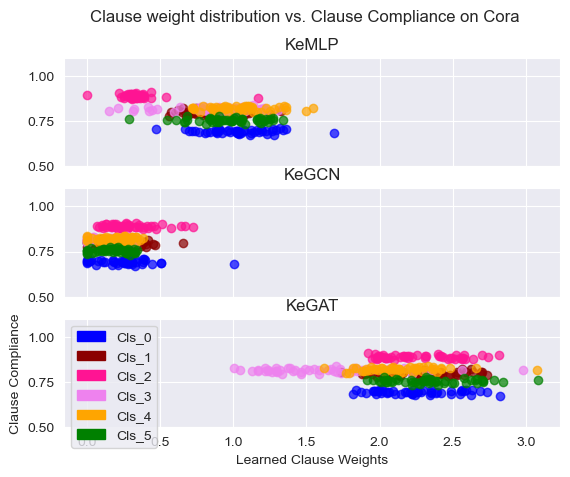

In [17]:
fig, axs = plt.subplots(3, sharex=True, sharey=True)
# make legend
color= ['blue', 'darkred', 'deeppink', 'violet', 'orange', 'green', 'dodgerblue']
cora_compliance = [0.7017, 0.8062, 0.8980, 0.8245, 0.8304, 0.7675, 0.7801]

#fig, axs = plt.subplots(3, sharex=True)
fig.suptitle(f'Clause weight distribution vs. Clause Compliance on Cora')
# Cora KeMLP
run_mlp = api.run("luisawerner/nesy23_clauseweights/kn8migwx")
mlp_cw_0 = run_mlp.config["clause_weight"]
mlp_cora_cw = eval(run_mlp.summary['logged_clause_weights'])

gcn_run = api.run("luisawerner/nesy23_clauseweights/jdy6cl5l")
gcn_cw_0 = gcn_run.config["clause_weight"]
gcn_cora_cw = eval(gcn_run.summary['logged_clause_weights'])

gat_run = api.run("luisawerner/nesy23_clauseweights/05c0g94v")
gat_cw_0 = gat_run.config["clause_weight"]
gat_cora_cw = eval(gat_run.summary['logged_clause_weights'])



patches = []
for k, j in enumerate(['0', '1', '2', '3', '4', '5']):
    patches.append(mpatches.Patch(color=color[k], label='Cls_'+j))
    noise = np.random.normal(-0.01, 0.01, 50)
    _list_mlp = [value[0][j][-1] for _, value  in mlp_cora_cw.items()]
    _list_gcn = [value[0][j][-1] for _, value  in gcn_cora_cw.items()]
    _list_gat = [value[0][j][-1] for _, value  in gat_cora_cw.items()]
    for index, i in enumerate(_list_mlp):
        axs[0].set_title('KeMLP')
        #axs[0].set_ylim(0.f, 1.1)
        axs[0].scatter(i, cora_compliance[k] + noise[index], color=color[k], alpha=0.7)
    for index, i in enumerate(_list_gcn):
        axs[1].set_title('KeGCN')
        #axs[1].set_ylim(0.5, 1.1)
        axs[1].scatter(i, cora_compliance[k] + noise[index], color=color[k], alpha=0.7)
    for index, i in enumerate(_list_gat):
        axs[2].set_title('KeGAT')
        #axs[2].set_ylim(0.5, 1.1)
        axs[2].scatter(i, cora_compliance[k] + noise[index], color=color[k], alpha=0.7)


# mean_cw = [np.mean([value[0][j][-1] for _, value  in mlp_citeseer_cw.items()]) for j in ['0', '1', '2', '3', '4', '5']]
# m,b = np.polyfit(citeseer_compliance, mean_cw, 1)
# axs[0].plot(citeseer_compliance,[m * i + b for i in mean_cw])

plt.ylabel('Clause Compliance')
plt.ylim(0.5, 1.1)
plt.xlabel('Learned Clause Weights')
#plt.legend(handles=patches)
plt.legend(handles=patches)
plt.savefig('figures/test_cora_compliance.pdf', format='pdf')

# Clause Compliance for Cora


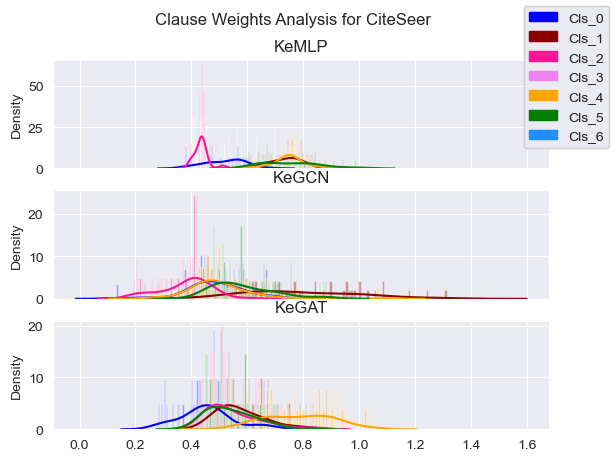

In [18]:
# CiteSeer
bins = 100
import seaborn as sns
import warnings
import matplotlib.patches as mpatches
warnings.simplefilter(action='ignore', category=FutureWarning)
num_classes=7

fig, axs = plt.subplots(3, sharex=True)
# make legend
color= ['blue', 'darkred', 'deeppink', 'violet', 'orange', 'green', 'dodgerblue']
handles = []
for i in range(num_classes):
    handles.append(mpatches.Patch(color=color[i], label='Cls_' + str(i)))
fig.legend(handles=handles)

#fig, axs = plt.subplots(3, sharex=True)
fig.suptitle('Clause Weights Analysis for CiteSeer')
# Cora KeMLP
run_mlp = api.run("luisawerner/nesy23_clauseweights/4th2ilog")
mlp_cw_0 = run_mlp.config["clause_weight"]
mlp_citeseer_cw = eval(run_mlp.summary['logged_clause_weights'])

gcn_run = api.run("luisawerner/nesy23_clauseweights/2syp45e0")
gcn_cw_0 = gcn_run.config["clause_weight"]
gcn_citeseer_cw = eval(gcn_run.summary['logged_clause_weights'])

gat_run = api.run("luisawerner/nesy23_clauseweights/l1747m17")
gat_cw_0 = gat_run.config["clause_weight"]
gat_citeseer_cw = eval(gat_run.summary['logged_clause_weights'])

# KeMLP
for i in ['0', '1', '2', '4', '5']:
    sns.distplot([value[0][i][-1] for _, value  in mlp_citeseer_cw.items()], bins=bins, color=color[int(i)], label=str('Cls_'+ i), ax=axs[0] )
axs[0].set_title(f'KeMLP')

#KeGCN
for i in ['0', '1', '2', '4', '5']:
    sns.distplot([value[0][i][-1] for _, value  in gcn_citeseer_cw.items()], bins=bins, color=color[int(i)], label=str('Cls_'+ i), ax=axs[1] )
axs[1].set_title(f'KeGCN')

# KeGAT
for i in ['0', '1', '2', '4', '5']:
    sns.distplot([value[0][i][-1] for _, value  in gat_citeseer_cw.items()], bins=bins, color=color[int(i)], label=str('Cls_'+ i), ax=axs[2] )
axs[2].set_title(f'KeGAT')


fig.legend(handles=handles)
plt.savefig('figures/test_citeseer_cw_distribution.pdf', format='pdf')

## Clause Compliance for Citeseer
| | overall | train | valid | test |
| --------- | --------- | -------- | -------- | --------- |
| Class_0 | 0.3646 | 0.3086 | 0.1666 | 0.4166 |
| Class_1 | 0.6366 | 0.5721 | 0.7741 | 0.6281 |
| Class_2 | 0.7835 | 0.7837 | 0.75 | 0.7762 |
| Class_3 | 0.7625 | 0.72 | 0.8 | 0.7894 |
| Class_4 | 0.7951 | 0.7705 | 0.8846 | 0.8088 |
| Class_5 | 0.7910 | 0.7739 | 0.6666 | 0.84482 |

## Class Distribution for Citeseer
| | overall | train | valid | test |
| --------- | --------- | -------- | --------- | -------- |
| Class_0 | 0.0793 | 0.0864 | 0.058 | 0.077 |
| Class_1 | 0.1773 | 0.1762 | 0.172 | 0.182 |
| Class_2 | 0.2007 | 0.2030 | 0.232 | 0.181 |
| Class_3 | 0.2107 | 0.1992 | 0.212 | 0.231 |
| Class_4 | 0.1791 | 0.1822 | 0.188 | 0.169 |
| Class_5 | 0.1526 | 0.1527 | 0.138 | 0.16 |

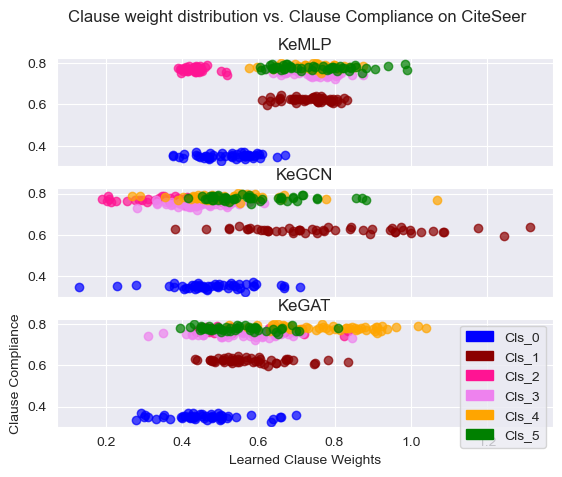

In [19]:
fig, axs = plt.subplots(3, sharex=True, sharey=True)
# make legend
color= ['blue', 'darkred', 'deeppink', 'violet', 'orange', 'green', 'dodgerblue']
citeseer_compliance = [0.3646, 0.6366,0.7835, 0.7625, 0.7951, 0.7910]

#fig, axs = plt.subplots(3, sharex=True)
fig.suptitle(f'Clause weight distribution vs. Clause Compliance on CiteSeer')
# Cora KeMLP
run_mlp = api.run("luisawerner/nesy23_clauseweights/4th2ilog")
mlp_cw_0 = run_mlp.config["clause_weight"]
mlp_citeseer_cw = eval(run_mlp.summary['logged_clause_weights'])

gcn_run = api.run("luisawerner/nesy23_clauseweights/2syp45e0")
gcn_cw_0 = gcn_run.config["clause_weight"]
gcn_citeseer_cw = eval(gcn_run.summary['logged_clause_weights'])

gat_run = api.run("luisawerner/nesy23_clauseweights/l1747m17")
gat_cw_0 = gat_run.config["clause_weight"]
gat_citeseer_cw = eval(gat_run.summary['logged_clause_weights'])


noise = np.random.normal(-0.01, 0.01, 50)
patches = []
for k, j in enumerate(['0', '1', '2', '3', '4', '5']):
    patches.append(mpatches.Patch(color=color[k], label='Cls_'+j))
    _list_mlp = [value[0][j][-1] for _, value  in mlp_citeseer_cw.items()]
    _list_gcn = [value[0][j][-1] for _, value  in gcn_citeseer_cw.items()]
    _list_gat = [value[0][j][-1] for _, value  in gat_citeseer_cw.items()]
    for index, i in enumerate(_list_mlp):
        axs[0].set_title('KeMLP')
        axs[0].scatter(i, citeseer_compliance[k] + noise[index], color=color[k], alpha=0.7)
    for index, i in enumerate(_list_gcn):
        axs[1].set_title('KeGCN')
        axs[1].scatter(i, citeseer_compliance[k] + noise[index], color=color[k], alpha=0.7)
    for index, i in enumerate(_list_gat):
        axs[2].set_title('KeGAT')
        axs[2].scatter(i, citeseer_compliance[k] + noise[index], color=color[k], alpha=0.7)


# mean_cw = [np.mean([value[0][j][-1] for _, value  in mlp_citeseer_cw.items()]) for j in ['0', '1', '2', '3', '4', '5']]
# m,b = np.polyfit(citeseer_compliance, mean_cw, 1)
# axs[0].plot(citeseer_compliance,[m * i + b for i in mean_cw])

plt.ylabel('Clause Compliance')
plt.xlabel('Learned Clause Weights')
#plt.legend(handles=patches)
# plt.legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, -0.35),
#           fancybox=True, shadow=True, ncol=5)
plt.legend(handles=patches)
plt.savefig('figures/test_citeseer_compliance.pdf', format='pdf')

###  For NeSy Workshop Paper
## Interprete learned clause weights
# 1. For CORA


In [20]:
# How are final clause weight values ?
# Example for Cora KeMLP
import wandb
api = wandb.Api()
num_classes = 7
num_runs = 50
# for Cora
cora_keMLP = eval(api.run("luisawerner/nesy23/3ro8287h").summary['logged_clause_weights'])
cora_keGCN = eval(api.run("luisawerner/nesy23/1agooev5").summary['logged_clause_weights'])
cora_keGAT = eval(api.run("luisawerner/nesy23/3ob9d8s0").summary['logged_clause_weights'])



## Cora KeMLP
Learned clause weights averaged over runs in the last epoch of training
initialization 0.5

In [21]:
num_layers = 4
# print clause weights of last epoch
for cls in range(num_classes):
    for layer in range(num_layers):
        cls_list = [cora_keMLP[i][layer][str(cls)][1] for i in range(num_runs)]
        print(f'Class {cls}, Layer {layer}: Mean clause weight {np.mean(cls_list)}, std clause weight: {np.std(cls_list)}')


Class 0, Layer 0: Mean clause weight 0.6018255084753037, std clause weight: 0.048160323262153776
Class 0, Layer 1: Mean clause weight 0.5451794475317001, std clause weight: 0.08394155466710988
Class 0, Layer 2: Mean clause weight 0.47305546879768373, std clause weight: 0.05241920791230282
Class 0, Layer 3: Mean clause weight 0.4539644241333008, std clause weight: 0.042772865529338226
Class 1, Layer 0: Mean clause weight 0.5507695811986923, std clause weight: 0.07738913817647067
Class 1, Layer 1: Mean clause weight 0.505237364768982, std clause weight: 0.07052322937252682
Class 1, Layer 2: Mean clause weight 0.4738943499326706, std clause weight: 0.04843193111174744
Class 1, Layer 3: Mean clause weight 0.4682398223876953, std clause weight: 0.04587087824870378
Class 2, Layer 0: Mean clause weight 0.40961839199066163, std clause weight: 0.014088333507707081
Class 2, Layer 1: Mean clause weight 0.39070788979530335, std clause weight: 0.02476803229938337
Class 2, Layer 2: Mean clause weigh

## Cora KeGCN
Learned clause weights averaged over runs in the last epoch of training
init: random

In [22]:
num_layers=2
for cls in range(num_classes):
    for layer in range(num_layers):
        cls_list = [cora_keGCN[i][layer][str(cls)][1] for i in range(num_runs)]
        print(f'Class {cls}, Layer {layer}: Mean clause weight {np.mean(cls_list)}, std clause weight: {np.std(cls_list)}')


Class 0, Layer 0: Mean clause weight 0.4074560048803687, std clause weight: 0.26743910287067846
Class 0, Layer 1: Mean clause weight 0.4499649726226926, std clause weight: 0.24039272401789394
Class 1, Layer 0: Mean clause weight 0.4250004864111543, std clause weight: 0.2627384630870741
Class 1, Layer 1: Mean clause weight 0.4935294199921191, std clause weight: 0.23386491148327207
Class 2, Layer 0: Mean clause weight 0.4144063044153154, std clause weight: 0.2726394838712962
Class 2, Layer 1: Mean clause weight 0.3674118061736226, std clause weight: 0.2937450812480383
Class 3, Layer 0: Mean clause weight 0.37120726145920346, std clause weight: 0.29590527754886187
Class 3, Layer 1: Mean clause weight 0.3997954445704818, std clause weight: 0.3044615575144753
Class 4, Layer 0: Mean clause weight 0.42280511882156135, std clause weight: 0.2807148714677097
Class 4, Layer 1: Mean clause weight 0.41709278169786557, std clause weight: 0.26761629777951446
Class 5, Layer 0: Mean clause weight 0.490


## Cora KeGAT


In [23]:
num_layers=1
for cls in range(num_classes):
    for layer in range(num_layers):
        cls_list = [cora_keGAT[i][layer][str(cls)][1] for i in range(num_runs)]
        print(f'Class {cls}, Layer {layer}: Mean clause weight {np.mean(cls_list)}, std clause weight: {np.std(cls_list)}')


Class 0, Layer 0: Mean clause weight 0.4815200024843216, std clause weight: 0.027340078000797612
Class 1, Layer 0: Mean clause weight 0.48680011451244354, std clause weight: 0.030244859801145364
Class 2, Layer 0: Mean clause weight 0.4736000084877014, std clause weight: 0.019799899261302555
Class 3, Layer 0: Mean clause weight 0.4802005606889725, std clause weight: 0.026399665435476363
Class 4, Layer 0: Mean clause weight 0.4973599475622177, std clause weight: 0.0328940924664203
Class 5, Layer 0: Mean clause weight 0.48943996489048003, std clause weight: 0.03126461744218799
Class 6, Layer 0: Mean clause weight 0.48812002420425415, std clause weight: 0.030787363278761762


# 2. For CiteSeer


In [24]:
# How are final clause weight values ?
# Example for Cora KeMLP
num_classes = 6
num_runs = 50
# for Cora
citeseer_keMLP = eval(api.run("luisawerner/nesy23/2jhyvc06").summary['logged_clause_weights'])
citeseer_keGCN = eval(api.run("luisawerner/nesy23/lsrwas08").summary['logged_clause_weights'])
citeseer_keGAT = eval(api.run("luisawerner/nesy23/nfvfp6nj").summary['logged_clause_weights'])

## KeMLP
initialization 0.5


In [25]:
num_layers=1
for cls in range(num_classes):
    for layer in range(num_layers):
        cls_list = [citeseer_keMLP[i][layer][str(cls)][1] for i in range(num_runs)]
        print(f'Class {cls}, Layer {layer}: Mean clause weight {np.mean(cls_list)}, std clause weight: {np.std(cls_list)}')


Class 0, Layer 0: Mean clause weight 0.07795365650439635, std clause weight: 0.06566873860276373
Class 1, Layer 0: Mean clause weight 0.3925414341688156, std clause weight: 0.08214339293516532
Class 2, Layer 0: Mean clause weight 0.36132278442382815, std clause weight: 0.05816718632844378
Class 3, Layer 0: Mean clause weight 0.4164541509747505, std clause weight: 0.09858392670364112
Class 4, Layer 0: Mean clause weight 0.5079831248521804, std clause weight: 0.10708495982997163
Class 5, Layer 0: Mean clause weight 0.4134669977426529, std clause weight: 0.1084889382438505


## KeGCN
Initialisation 0.25

In [26]:
num_layers=3
for cls in range(num_classes):
    for layer in range(num_layers):
        cls_list = [citeseer_keGCN[i][layer][str(cls)][1] for i in range(num_runs)]
        print(f'Class {cls}, Layer {layer}: Mean clause weight {np.mean(cls_list)}, std clause weight: {np.std(cls_list)}')


Class 0, Layer 0: Mean clause weight 0.22928001791238783, std clause weight: 0.030654212885997945
Class 0, Layer 1: Mean clause weight 0.21596000611782074, std clause weight: 0.014500947708969788
Class 0, Layer 2: Mean clause weight 0.21300000935792923, std clause weight: 9.238719940185547e-09
Class 1, Layer 0: Mean clause weight 0.2144800066947937, std clause weight: 0.010359982081830367
Class 1, Layer 1: Mean clause weight 0.21300000816583634, std clause weight: 7.354594873936811e-09
Class 1, Layer 2: Mean clause weight 0.21300000548362732, std clause weight: 7.300048299977714e-09
Class 2, Layer 0: Mean clause weight 0.22928000062704088, std clause weight: 0.03065422494362777
Class 2, Layer 1: Mean clause weight 0.22780000030994416, std clause weight: 0.029599995613100307
Class 2, Layer 2: Mean clause weight 0.2189200073480606, std clause weight: 0.020075683738584833
Class 3, Layer 0: Mean clause weight 0.21744001060724258, std clause weight: 0.01757401620000698
Class 3, Layer 1: Mea

## KeGAT

In [27]:
num_layers=2
for cls in range(num_classes):
    for layer in range(num_layers):
        cls_list = [citeseer_keGCN[i][layer][str(cls)][1] for i in range(num_runs)]
        print(f'Class {cls}, Layer {layer}: Mean clause weight {np.mean(cls_list)}, std clause weight: {np.std(cls_list)}')


Class 0, Layer 0: Mean clause weight 0.22928001791238783, std clause weight: 0.030654212885997945
Class 0, Layer 1: Mean clause weight 0.21596000611782074, std clause weight: 0.014500947708969788
Class 1, Layer 0: Mean clause weight 0.2144800066947937, std clause weight: 0.010359982081830367
Class 1, Layer 1: Mean clause weight 0.21300000816583634, std clause weight: 7.354594873936811e-09
Class 2, Layer 0: Mean clause weight 0.22928000062704088, std clause weight: 0.03065422494362777
Class 2, Layer 1: Mean clause weight 0.22780000030994416, std clause weight: 0.029599995613100307
Class 3, Layer 0: Mean clause weight 0.21744001060724258, std clause weight: 0.01757401620000698
Class 3, Layer 1: Mean clause weight 0.21300000548362732, std clause weight: 7.300048299977714e-09
Class 4, Layer 0: Mean clause weight 0.22040000468492507, std clause weight: 0.02219999065002689
Class 4, Layer 1: Mean clause weight 0.21300000667572022, std clause weight: 1.5554414213538043e-08
Class 5, Layer 0: Me

# PubMed

In [28]:
# How are final clause weight values ?
num_classes = 3
num_runs = 50
# for Cora
pubmed_keMLP = eval(api.run("luisawerner/nesy23/2tnphpvq").summary['logged_clause_weights'])
pubmed_keGCN = eval(api.run("luisawerner/nesy23/2bkseqxp").summary['logged_clause_weights'])
pubmed_keGAT = eval(api.run("luisawerner/nesy23/1fv9jhuv").summary['logged_clause_weights'])

## KeMLP
initialization = 0.001

In [29]:
num_layers=2
init = 0.001
for cls in range(num_classes):
    for layer in range(num_layers):
        cls_list = [pubmed_keMLP[i][layer][str(cls)][1] for i in range(num_runs)]
        print(f'Class {cls}, Layer {layer}: Mean clause weight {np.mean(cls_list)}, std clause weight: {np.std(cls_list)}')


Class 0, Layer 0: Mean clause weight 0.00804861990007339, std clause weight: 0.02194698660561983
Class 0, Layer 1: Mean clause weight 0.007927649058401584, std clause weight: 0.021580759043052032
Class 1, Layer 0: Mean clause weight 0.0743556019035168, std clause weight: 0.07597727684305167
Class 1, Layer 1: Mean clause weight 0.0706548953615129, std clause weight: 0.06995154976874667
Class 2, Layer 0: Mean clause weight 0.03792090380564332, std clause weight: 0.03990003756495839
Class 2, Layer 1: Mean clause weight 0.037497372563229873, std clause weight: 0.03900627608636647


## KeGCN
initialization = random

In [30]:
num_layers=1
for cls in range(num_classes):
    for layer in range(num_layers):
        cls_list = [pubmed_keGCN[i][layer][str(cls)][1] for i in range(num_runs)]
        print(f'Class {cls}, Layer {layer}: Mean clause weight {np.mean(cls_list)}, std clause weight: {np.std(cls_list)}')


Class 0, Layer 0: Mean clause weight 0.4549818195030093, std clause weight: 0.2914318393497584
Class 1, Layer 0: Mean clause weight 0.37402109494432806, std clause weight: 0.2348548035037939
Class 2, Layer 0: Mean clause weight 0.45398010592907667, std clause weight: 0.25980569227118794


## KeGAT
initialization = 0.5


In [31]:
num_layers=5
for cls in range(num_classes):
    for layer in range(num_layers):
        cls_list = [pubmed_keGAT[i][layer][str(cls)][1] for i in range(num_runs)]
        print(f'Class {cls}, Layer {layer}: Mean clause weight {np.mean(cls_list)}, std clause weight: {np.std(cls_list)}')


Class 0, Layer 0: Mean clause weight 0.5806922614574432, std clause weight: 0.0021606102826185565
Class 0, Layer 1: Mean clause weight 0.5569398725032806, std clause weight: 0.013488328482291801
Class 0, Layer 2: Mean clause weight 0.4184143513441086, std clause weight: 0.04617298872061934
Class 0, Layer 3: Mean clause weight 0.28779822677373884, std clause weight: 0.05552549284259561
Class 0, Layer 4: Mean clause weight 0.2706136780977249, std clause weight: 0.05657568194707434
Class 1, Layer 0: Mean clause weight 0.41400643408298493, std clause weight: 0.006181238369589682
Class 1, Layer 1: Mean clause weight 0.4056757545471191, std clause weight: 0.02926918638941936
Class 1, Layer 2: Mean clause weight 0.3972145411372185, std clause weight: 0.10513570784751224
Class 1, Layer 3: Mean clause weight 0.41970221638679506, std clause weight: 0.12656244032217145
Class 1, Layer 4: Mean clause weight 0.4281514871120453, std clause weight: 0.1287518910781832
Class 2, Layer 0: Mean clause weig

# Flickr



In [32]:
num_classes = 7
num_runs = 10

flickr_keMLP = eval(api.run("luisawerner/nesy23/18bmvs3p").summary['logged_clause_weights'])
flickr_keGCN = eval(api.run("luisawerner/nesy23/2a90jqbn").summary['logged_clause_weights'])
# flickr_keGAT = api.run("luisawerner/nesy23/byjp9gjy").summary['logged_clause_weights'] #[:10] todo no clause weights loggged, rerun

## KeMLP


In [33]:
num_layers=1
init = 0.001
for cls in range(num_classes):
    for layer in range(num_layers):
        cls_list = [flickr_keMLP[i][layer][str(cls)][1] for i in range(num_runs)]
        print(f'Class {cls}, Layer {layer}: Mean clause weight {np.mean(cls_list)}, std clause weight: {np.std(cls_list)}')


Class 0, Layer 0: Mean clause weight 0.0007999998446553871, std clause weight: 0.0009797951985139252
Class 1, Layer 0: Mean clause weight 2.3376196256474915e-10, std clause weight: 1.210576013984036e-10
Class 2, Layer 0: Mean clause weight 2.7101486749225857e-10, std clause weight: 1.1756817806544695e-10
Class 3, Layer 0: Mean clause weight 0.0004000002594664667, std clause weight: 0.0007999996267259947
Class 4, Layer 0: Mean clause weight 0.000999999981001018, std clause weight: 0.0009999997880309893
Class 5, Layer 0: Mean clause weight 0.00020000010272487877, std clause weight: 0.0005999999198131304
Class 6, Layer 0: Mean clause weight 0.000800000098906456, std clause weight: 0.000979795798866793


## KeGCN

In [34]:
num_layers=4
init = 0.001
for cls in range(num_classes):
    for layer in range(num_layers):
        cls_list = [flickr_keGCN[i][layer][str(cls)][1] for i in range(num_runs)]
        print(f'Class {cls}, Layer {layer}: Mean clause weight {np.mean(cls_list)}, std clause weight: {np.std(cls_list)}')


Class 0, Layer 0: Mean clause weight 0.0016999997198581696, std clause weight: 0.005099999159574508
Class 0, Layer 1: Mean clause weight 0.0016999997198581696, std clause weight: 0.005099999159574508
Class 0, Layer 2: Mean clause weight 0.0016999997198581696, std clause weight: 0.005099999159574508
Class 0, Layer 3: Mean clause weight 0.0016999999061226845, std clause weight: 0.0050999997183680534
Class 1, Layer 0: Mean clause weight 0.0016999928280711173, std clause weight: 0.005099978484213352
Class 1, Layer 1: Mean clause weight 0.0, std clause weight: 0.0
Class 1, Layer 2: Mean clause weight 0.0, std clause weight: 0.0
Class 1, Layer 3: Mean clause weight 0.0, std clause weight: 0.0
Class 2, Layer 0: Mean clause weight 0.0, std clause weight: 0.0
Class 2, Layer 1: Mean clause weight 0.0, std clause weight: 0.0
Class 2, Layer 2: Mean clause weight 0.0, std clause weight: 0.0
Class 2, Layer 3: Mean clause weight 0.0, std clause weight: 0.0
Class 3, Layer 0: Mean clause weight 0.00339

# Re-calculate compliances for the datasets with fixed splits


In [35]:
import numpy as np
def compute_compliance(data, num_classes):
    """
    compute clause compliance per iteration
    returns a list of length |number classes| with compliance value per each
    """
    # y = model.data.y.cpu().detach().numpy() do we need to detach or is this even slowing down the code?
    y = data.y.numpy()
    edge_index = np.transpose(data.edge_index.numpy())
    train_mask = data.train_mask.numpy()
    train_edge_mask = np.logical_or(train_mask[edge_index[:, 0]], train_mask[edge_index[:, 1]])

    # calculate the classes corresponding to edge index
    edge_index_cls = np.zeros_like(edge_index)
    for row in range(edge_index.shape[0]):
        edge_index_cls[row, 0] = y[edge_index[row, 0]]
        edge_index_cls[row, 1] = y[edge_index[row, 1]]

    compliance = []
    for cls in range(num_classes):
        cls_mask = np.logical_or(edge_index_cls[:, 0] == cls, edge_index_cls[:, 1] == cls)
        mask = np.logical_and(cls_mask, train_edge_mask) # edges that have at least a training node and a node of class cls
        same_mask = np.logical_and(mask, np.equal(edge_index_cls[:, 0], edge_index_cls[:, 1])) # edges that are of the above set and have the same class for both nodes
        cls_compliance = sum(same_mask)/sum(mask)
        compliance.append(cls_compliance)

    return compliance

In [36]:
import torch_geometric.datasets
[cora_dataset] = torch_geometric.datasets.Planetoid(root='Cora', name='Cora', split="full")
[citeseer_dataset] = torch_geometric.datasets.Planetoid(root='CiteSeer', name='CiteSeer', split="full")
[pubmed_dataset] = torch_geometric.datasets.Planetoid(root='PubMed', name='PubMed', split="full")
[flickr_dataset] = getattr(torch_geometric.datasets, 'Flickr')(root='Flickr')

# Compliances of Datasets

In [37]:
print(f'Compliance Cora: {compute_compliance(cora_dataset, num_classes=7)}')
print(f'Compliance CiteSeer: {compute_compliance(citeseer_dataset, num_classes=6)}')
print(f'Compliance PubMed: {compute_compliance(pubmed_dataset, num_classes=3)}')
print(f'Compliance Flickr: {compute_compliance(flickr_dataset, num_classes=7)}')


Compliance Cora: [0.516, 0.657074340527578, 0.8295904887714664, 0.7107142857142857, 0.7214170692431562, 0.6339468302658486, 0.6179401993355482]
Compliance CiteSeer: [0.23054755043227665, 0.45161290322580644, 0.6481203007518797, 0.6135204081632653, 0.6585067319461444, 0.6395348837209303]
Compliance PubMed: [0.4921793534932221, 0.7432938400779607, 0.6903725205611998]
Compliance Flickr: [0.04393460436629458, 0.1334592655494515, 0.0741020871236125, 0.04512233049968899, 0.2411165573874849, 0.0328884652049571, 0.2782410646348999]


# Make compliance vs. clause weights plot for KeMLP again

 Here KeMLP (corresponds to run electric-grass-1), clause weight initialization 0.5, 1 KE layer

Class 0, Layer 0: Mean of learned clause weight over runs: 0.26181708998978137, std clause weight: 0.1154828759378035
Class 1, Layer 0: Mean of learned clause weight over runs: 0.5589083027839661, std clause weight: 0.10722976960608903
Class 2, Layer 0: Mean of learned clause weight over runs: 0.4597557330131531, std clause weight: 0.07048110876242997
Class 3, Layer 0: Mean of learned clause weight over runs: 0.6695162296295166, std clause weight: 0.15115924230904304
Class 4, Layer 0: Mean of learned clause weight over runs: 0.733261729478836, std clause weight: 0.15841206592031695
Class 5, Layer 0: Mean of learned clause weight over runs: 0.7155715578794479, std clause weight: 0.15504454028652984
Citeseer Compliance: [0.23054755043227665, 0.45161290322580644, 0.6481203007518797, 0.6135204081632653, 0.6585067319461444, 0.6395348837209303]


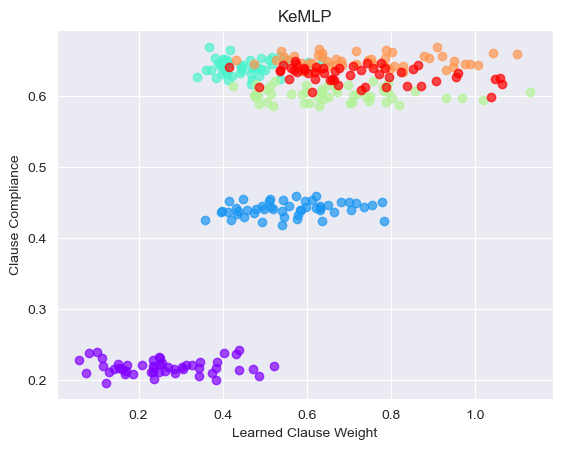

In [56]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy
import json
import seaborn as sns
color = plt.cm.rainbow(np.linspace(0, 1, 6))

num_layers=1
for cls in range(6):
    for layer in range(num_layers):
        cls_list = [citeseer_keMLP[i][layer][str(cls)][-1] for i in range(50)]
        print(f'Class {cls}, Layer {layer}: Mean of learned clause weight over runs: {np.mean(cls_list)}, std clause weight: {np.std(cls_list)}')

plt.figure()

citeseer_compliance = compute_compliance(citeseer_dataset, num_classes=6)
print(f'Citeseer Compliance: {citeseer_compliance}')

patches = []
for k, j in enumerate(['0', '1', '2', '3', '4', '5']):
    patches.append(mpatches.Patch(color=color[k], label='Class_'+j))
    _list = [citeseer_keMLP[i][0][j][-1] for i in range(50)]
    for i in _list:
        plt.scatter(i, citeseer_compliance[k] + np.random.normal(-0.01, 0.01)
                    , color=color[k], alpha=0.7)

plt.ylabel('Clause Compliance')
plt.xlabel('Learned Clause Weight')
#plt.legend(handles=patches)
plt.title('KeMLP')
# plt.legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=5)
plt.savefig('figures/CiteSeer_KeMLP_clauseweights.pdf', format='pdf', bbox_inches = 'tight')
plt.show()


# plot clause weight evolution over epochs


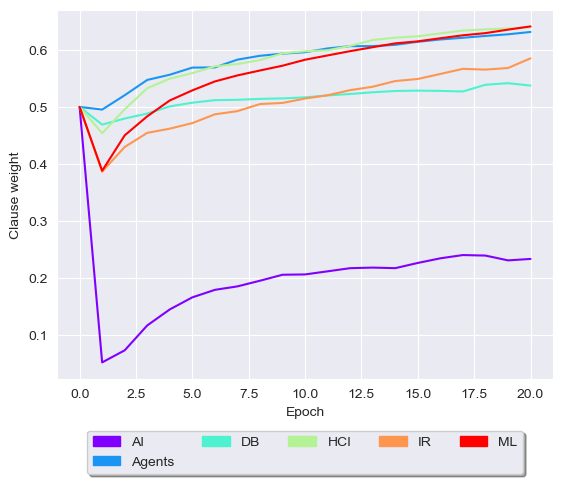

In [68]:
run = 9
# 4
patches = []
classes_citeSeer=['AI', 'Agents', 'DB', 'HCI', 'IR', 'ML']
for k, j in enumerate(['0', '1', '2', '3', '4', '5']):
    patches.append(mpatches.Patch(color=color[k], label=classes_citeSeer[k]))
    _list = citeseer_keMLP[run][0][j]
    plt.plot(_list, color=color[k])
plt.legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, -0.12),
           fancybox=True, shadow=True, ncol=5)
plt.ylabel('Clause weight')
plt.xlabel('Epoch')
plt.savefig('figures/CiteSeer_KeMLP_cw_evolution.pdf', format='pdf', bbox_inches = 'tight')
plt.show()

## CiteSeer KeGCN
corresponds to run easy-energy-5, 3 Ke layers, initialization 0.25

Class 0, Layer 0: Mean of learned clause weight over runs: 0.08904022110742517, std clause weight: 0.10023328962135504
Class 0, Layer 1: Mean of learned clause weight over runs: 0.09091285024478565, std clause weight: 0.09290821472341014
Class 0, Layer 2: Mean of learned clause weight over runs: 0.09503407170413994, std clause weight: 0.08955175060839203
Class 1, Layer 0: Mean of learned clause weight over runs: 0.536179497539997, std clause weight: 0.24311535092248568
Class 1, Layer 1: Mean of learned clause weight over runs: 0.530592385828495, std clause weight: 0.22749175228803836
Class 1, Layer 2: Mean of learned clause weight over runs: 0.5322745367884636, std clause weight: 0.2256027161761762
Class 2, Layer 0: Mean of learned clause weight over runs: 0.039621257334947584, std clause weight: 0.07716613869538516
Class 2, Layer 1: Mean of learned clause weight over runs: 0.028618221755605192, std clause weight: 0.058418254612256214
Class 2, Layer 2: Mean of learned clause weight ove

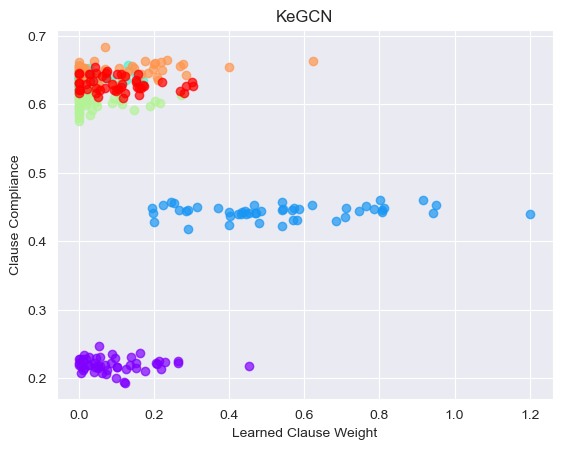

In [58]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy
import json
import seaborn as sns
color = plt.cm.rainbow(np.linspace(0, 1, 6))

num_layers=3
for cls in range(6):
    for layer in range(num_layers):
        cls_list = [citeseer_keGCN[i][layer][str(cls)][-1] for i in range(50)]
        print(f'Class {cls}, Layer {layer}: Mean of learned clause weight over runs: {np.mean(cls_list)}, std clause weight: {np.std(cls_list)}')

citeseer_compliance = compute_compliance(citeseer_dataset, num_classes=6)
print(f'Citeseer Compliance: {citeseer_compliance}')

#for l in range(3):
plt.figure()
patches = []
for k, j in enumerate(['0', '1', '2', '3', '4', '5']):
    patches.append(mpatches.Patch(color=color[k], label='Class_'+j))
    _list = [citeseer_keGCN[i][2][j][-1] for i in range(50)]
    for i in _list:
        plt.scatter(i, citeseer_compliance[k] + np.random.normal(-0.01, 0.01)
                    , color=color[k], alpha=0.7)

plt.ylabel('Clause Compliance')
plt.title('KeGCN')
plt.xlabel('Learned Clause Weight')
#plt.legend(handles=patches)
# plt.title(f'Clause weight distribution of {l+1}-th layer vs. Clause Compliance, clause weight initialization: 0.25')
# plt.legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=5)
plt.savefig('figures/CiteSeer_KeGCN_clauseweights.pdf', format='pdf', bbox_inches = 'tight')
plt.show()




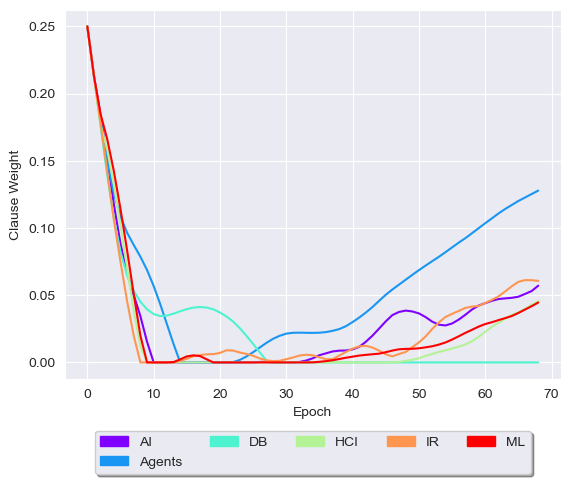

In [69]:
run = 13
#13, 16, 22
patches = []
classes_citeSeer=['AI', 'Agents', 'DB', 'HCI', 'IR', 'ML']
for k, j in enumerate(['0', '1', '2', '3', '4', '5']):
    patches.append(mpatches.Patch(color=color[k], label=classes_citeSeer[k]))
    _list = citeseer_keGCN[run][0][j]
    plt.plot(_list, color=color[k])
plt.legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, -0.12),
           fancybox=True, shadow=True, ncol=5)
plt.ylabel('Clause Weight')
plt.xlabel('Epoch')
plt.savefig('figures/CiteSeer_KeGCN_cw_evolution.pdf', format='pdf', bbox_inches = 'tight')
plt.show()

# CiteSeer KeGAT
run earthy planet, 2 Ke layers, initialization 0.1


Class 0, Layer 0: Mean of learned clause weight over runs: 0.8204052352905273, std clause weight: 0.10785221622041555
Class 0, Layer 1: Mean of learned clause weight over runs: 0.818430849313736, std clause weight: 0.10638020523441091
Class 1, Layer 0: Mean of learned clause weight over runs: 0.8152503561973572, std clause weight: 0.13222490988318744
Class 1, Layer 1: Mean of learned clause weight over runs: 0.8143601393699647, std clause weight: 0.13091954967162892
Class 2, Layer 0: Mean of learned clause weight over runs: 0.7156603026390076, std clause weight: 0.10835081567417258
Class 2, Layer 1: Mean of learned clause weight over runs: 0.7108577120304108, std clause weight: 0.10783606100159752
Class 3, Layer 0: Mean of learned clause weight over runs: 0.8460302484035492, std clause weight: 0.13104518626761097
Class 3, Layer 1: Mean of learned clause weight over runs: 0.8463243424892426, std clause weight: 0.13209286957555577
Class 4, Layer 0: Mean of learned clause weight over runs

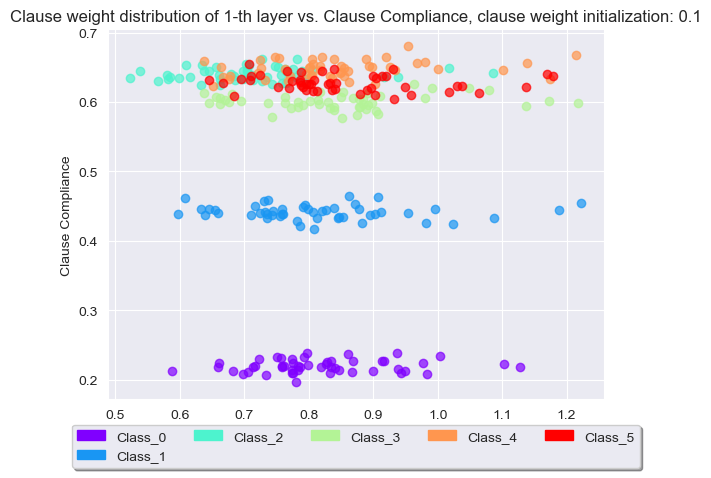

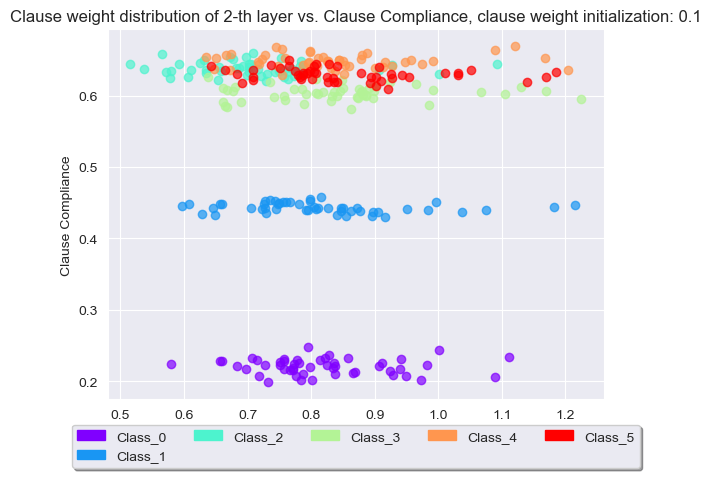

In [42]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy
import json
import seaborn as sns
color = plt.cm.rainbow(np.linspace(0, 1, 6))

num_layers=2
for cls in range(6):
    for layer in range(num_layers):
        cls_list = [citeseer_keGAT[i][layer][str(cls)][-1] for i in range(50)]
        print(f'Class {cls}, Layer {layer}: Mean of learned clause weight over runs: {np.mean(cls_list)}, std clause weight: {np.std(cls_list)}')

citeseer_compliance = compute_compliance(citeseer_dataset, num_classes=6)
print(f'Citeseer Compliance: {citeseer_compliance}')

for l in range(num_layers):
    plt.figure()
    patches = []
    for k, j in enumerate(['0', '1', '2', '3', '4', '5']):
        patches.append(mpatches.Patch(color=color[k], label='Class_'+j))
        _list = [citeseer_keGAT[i][l][j][-1] for i in range(50)]
        for i in _list:
            plt.scatter(i, citeseer_compliance[k] + np.random.normal(-0.01, 0.01)
                        , color=color[k], alpha=0.7)

    plt.ylabel('Clause Compliance')
    plt.xlabel('Clause Weights (over all epochs)')
    #plt.legend(handles=patches)
    plt.title(f'Clause weight distribution of {l+1}-th layer vs. Clause Compliance, clause weight initialization: 0.1')
    plt.legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=5)

    plt.show()

# Make Multiplot for Paper

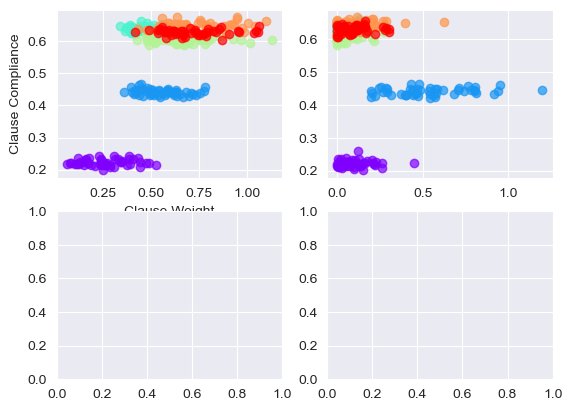

In [50]:
fig, axs = plt.subplots(2, 2)

classes = ['0', '1', '2', '3', '4', '5']
patches = []
for k, j in enumerate(classes):
    patches.append(mpatches.Patch(color=color[k], label='Class_'+j))

for k, j in enumerate(classes):
    mlp_list = [citeseer_keMLP[i][0][j][-1] for i in range(50)]
    gcn_list = [citeseer_keGCN[i][2][j][-1] for i in range(50)]
    for i in mlp_list:
        axs[0, 0].scatter(i, citeseer_compliance[k] + np.random.normal(-0.01, 0.01)
                    , color=color[k], alpha=0.7)

    for i in gcn_list:
        axs[0, 1].scatter(i, citeseer_compliance[k] + np.random.normal(-0.01, 0.01)
                    , color=color[k], alpha=0.7)
    # axs[1,0].plot(citeseer_keMLP[run][0][j], color=color[k])
    # axs[1,1].plot(citeseer_keGCN[run][0][j], color=color[k])

    axs[0,0].set_xlabel('Clause Weight')
    axs[0,0].set_ylabel('Clause Compliance')

